In [53]:
'''import pandas as pd
import numpy as np
from pgmpy.estimators import K2Score
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BayesianEstimator
import random

def load_data(DATA_CSV):
    D = pd.read_csv(DATA_CSV)
    V = D.columns
    D = D.sample(frac=1, axis=1)  # Embaralha as colunas
    V_shuffled_columns = D.columns
    #print(f'ARQUIVO: {D}')
    #print(f'VARIÁVEIS: {V}')
    return D, V, D, V_shuffled_columns

def calcular_k2(D):
    k2score = K2Score(D)
    return k2score

def estimar_modelo(D):
    k2score = K2Score(D)  # Calcula o K2Score com os dados embaralhados
    estimator_k2 = HillClimbSearch(D)
    print(estimator_k2)  # Usa os dados embaralhados para a busca
    max_possible_edges = len(V_shuffled_columns) * (len(V_shuffled_columns) - 1) / 2
    max_iter = min(max_possible_edges, 1000)
    best_model = estimator_k2.estimate(scoring_method='k2score', max_indegree=4, max_iter=max_iter)
    k2_score = k2score.score(best_model)  # Calcula o score com os dados embaralhados
    return best_model, k2_score

def estimar_modelo(D):
    k2score = K2Score(D)
    best_score = float("-inf")
    best_model = None

    # Teste diferentes ordens de variáveis e escolha a que maximiza o K2Score
    for i in range(10):  # Teste 10 ordens aleatórias diferentes
        random_order = random.sample(D.columns.tolist(), len(D.columns))
        estimator_k2 = HillClimbSearch(D[random_order])
        model = estimator_k2.estimate(scoring_method='k2score', max_indegree=4, max_iter=1000)
        score = k2score.score(model)
        print(f"Ordem[{random_order}]: Score:", end=" ")
        print(score)
        print('------------------------------------')
        if score > best_score:
            best_score = score
            best_model = model

    return best_model, best_score

def tabular_cpd(best_model, D):
    bayesian_network = BayesianNetwork(best_model)
    estimator = BayesianEstimator(bayesian_network, D)
    cpds = []
    for node in bayesian_network.nodes():
        cpd = estimator.estimate_cpd(node)
        cpds.append(cpd)
    return cpds, bayesian_network

# Caminho do arquivo CSV original
DATA_CSV = 'sachs.csv'

# Carregar dados
D, V, D, V_shuffled_columns = load_data(DATA_CSV)


# Estima a estrutura do modelo com o K2
#print(f'Ordem das variáveis antes de estimar: {D}')
print(f'Ordem das variáveis antes de estimar: {V}')
print('---------------- ESTIMANDO ----------------')
print(f'Arquivo com a ordem aleatória para estimar')
print(D)
print(f'Ordem das variáveis aleatórias para estimar: {V_shuffled_columns}')
best_model, k2_score = estimar_modelo(D)
print(f'Melhor modelo: {best_model}')
print(f'Valor de Score: {k2_score}')


# Exibe a estrutura do modelo
structure = (best_model.edges)
print(f'Estrutura da rede: {structure}')

# Estima as CPDs e passa a bayesian_network
cpds, bayesian_network = tabular_cpd(best_model, D)
print(f'CPDs: {cpds}')
print(f'Bayesian Network: {bayesian_network}')'''


Ordem das variáveis antes de estimar: Index(['Akt', 'Erk', 'Jnk', 'Mek', 'P38', 'PIP2', 'PIP3', 'PKA', 'PKC', 'Plcg',
       'Raf'],
      dtype='object')
---------------- ESTIMANDO ----------------
Arquivo com a ordem aleatória para estimar
      PKA  P38  PIP3  Raf  Mek  Jnk  Plcg  Erk  PKC  Akt  PIP2
0       2    1     2    1    1    1     1    1    3    1     1
1       2    2     2    1    1    1     1    2    2    1     1
2       1    3     2    3    1    3     3    1    1    1     2
3       3    1     3    2    1    1     1    2    1    1     1
4       2    1     3    1    1    1     2    2    2    1     1
...   ...  ...   ...  ...  ...  ...   ...  ...  ...  ...   ...
9995    2    1     1    1    1    1     1    2    2    1     1
9996    2    1     3    2    2    1     1    3    2    2     1
9997    2    1     2    1    2    2     3    3    2    2     1
9998    2    1     2    1    1    2     1    3    2    2     1
9999    1    1     2    2    3    1     1    3    1    3     1

[

 42%|████▏     | 23/55 [00:01<00:02, 13.61it/s]


Melhor modelo: DAG with 11 nodes and 18 edges
Valor de Score: -72231.66380308164
Estrutura da rede: [('PKA', 'Mek'), ('PKA', 'Jnk'), ('PKA', 'Erk'), ('PKA', 'Raf'), ('PKA', 'Akt'), ('P38', 'PKA'), ('P38', 'PKC'), ('Mek', 'Raf'), ('Mek', 'Akt'), ('Mek', 'Erk'), ('Plcg', 'PIP3'), ('PKC', 'Jnk'), ('PKC', 'Raf'), ('PKC', 'Mek'), ('PKC', 'PKA'), ('Akt', 'Erk'), ('PIP2', 'Plcg'), ('PIP2', 'PIP3')]
CPDs: [<TabularCPD representing P(PKA:3 | P38:3, PKC:3) at 0x257e1638800>, <TabularCPD representing P(P38:3) at 0x257dd4d6840>, <TabularCPD representing P(PIP3:3 | PIP2:3, Plcg:3) at 0x257e0444b60>, <TabularCPD representing P(Raf:3 | Mek:3, PKA:3, PKC:3) at 0x257e3064590>, <TabularCPD representing P(Mek:3 | PKA:3, PKC:3) at 0x257e305cc80>, <TabularCPD representing P(Jnk:3 | PKA:3, PKC:3) at 0x257e301af90>, <TabularCPD representing P(Plcg:3 | PIP2:3) at 0x257e1635c40>, <TabularCPD representing P(Erk:3 | Akt:3, Mek:3, PKA:3) at 0x257e0458740>, <TabularCPD representing P(PKC:3 | P38:3) at 0x257e301b59

In [75]:
import pandas as pd
import numpy as np
from pgmpy.estimators import K2Score, HillClimbSearch, PC
from pgmpy.models import BayesianNetwork
import random

# Função para calcular K2 Score para uma estrutura de rede bayesiana
def calculate_k2_score(model, data):
    k2_score = K2Score(data)
    return k2_score.score(model)

# Função para gerar uma ordem aleatória das variáveis
def generate_random_order(variables):
    return random.sample(variables, len(variables))

# Carregar dados do CSV
data = pd.read_csv('contact-lenses.csv')

# Extrair o nome das variáveis a partir das colunas do DataFrame
variables = list(data.columns)

# Número de ordens aleatórias que queremos gerar
num_orders = 10

# Calcular K2 Score para cada ordem aleatória
for i in range(num_orders):
    # Gerar uma ordem aleatória
    random_order = generate_random_order(variables)
    
    # Criar modelo bayesiano com a ordem aleatória das variáveis
    start_dag = BayesianNetwork([(random_order[i], random_order[i+1]) for i in range(len(random_order)-1)])
    
    # Estimar a estrutura da rede bayesiana a partir dos dados com inicialização aleatória
    hc = HillClimbSearch(data)
    max_possible_edges = len(random_order) * (len(random_order) - 1) / 2
    max_iter = min(max_possible_edges, 1000)
    estimated_model = hc.estimate(start_dag=start_dag, max_indegree=4, max_iter=max_iter)
    
    # Estimar parâmetros do modelo a partir dos dados
    estimated_model.fit(data)
    
    # Calcular K2 Score para a estrutura do modelo
    k2_score = calculate_k2_score(estimated_model, data)
    
    # Imprimir resultados
    print(f"Ordem aleatória: {random_order}")
    print(f"Estrutura estimada: {list(estimated_model.edges())}")
    print(f"K2 Score: {k2_score}")
    print("\n")
print('------------------------------------------------------------------------------')

k2score = K2Score(data)

best_model = hc.estimate(max_indegree=4, max_iter=max_iter)
best_score = k2score.score(best_model)
print(f'Melhor Estrutura: {best_model.edges}')
print(f'Melhor Score: {best_score}')

Working for n conditional variables: 0:   0%|          | 0/5 [00:00<?, ?it/s]

Working for n conditional variables: 2:  40%|████      | 2/5 [00:00<00:00, 35.29it/s]


Estrutura inicial estimada:
[('tear-prod-rate', 'contact-lenses')]


 40%|████      | 4/10 [00:00<00:00, 21.52it/s]


Ordem aleatória: ['age', 'contact-lenses', 'tear-prod-rate', 'spectacle-prescrip', 'astigmatism']
Estrutura estimada: [('contact-lenses', 'tear-prod-rate'), ('contact-lenses', 'astigmatism')]
K2 Score: -98.72503647411929




 60%|██████    | 6/10 [00:00<00:00, 24.53it/s]


Ordem aleatória: ['tear-prod-rate', 'age', 'contact-lenses', 'astigmatism', 'spectacle-prescrip']
Estrutura estimada: [('tear-prod-rate', 'age'), ('contact-lenses', 'astigmatism'), ('contact-lenses', 'age'), ('contact-lenses', 'tear-prod-rate'), ('astigmatism', 'age'), ('spectacle-prescrip', 'age')]
K2 Score: -91.99933532431857




 50%|█████     | 5/10 [00:00<00:00, 29.10it/s]


Ordem aleatória: ['astigmatism', 'age', 'contact-lenses', 'tear-prod-rate', 'spectacle-prescrip']
Estrutura estimada: [('astigmatism', 'age'), ('contact-lenses', 'tear-prod-rate'), ('contact-lenses', 'age'), ('contact-lenses', 'astigmatism'), ('tear-prod-rate', 'age'), ('spectacle-prescrip', 'age')]
K2 Score: -91.99933532431857




 50%|█████     | 5/10 [00:00<00:00, 26.84it/s]


Ordem aleatória: ['age', 'astigmatism', 'spectacle-prescrip', 'contact-lenses', 'tear-prod-rate']
Estrutura estimada: [('contact-lenses', 'tear-prod-rate'), ('contact-lenses', 'astigmatism')]
K2 Score: -98.72503647411929




 60%|██████    | 6/10 [00:00<00:00, 43.09it/s]


Ordem aleatória: ['spectacle-prescrip', 'age', 'tear-prod-rate', 'astigmatism', 'contact-lenses']
Estrutura estimada: [('contact-lenses', 'astigmatism'), ('contact-lenses', 'tear-prod-rate')]
K2 Score: -98.72503647411928




 40%|████      | 4/10 [00:00<00:00, 20.53it/s]


Ordem aleatória: ['contact-lenses', 'astigmatism', 'age', 'tear-prod-rate', 'spectacle-prescrip']
Estrutura estimada: [('contact-lenses', 'astigmatism'), ('contact-lenses', 'tear-prod-rate')]
K2 Score: -98.72503647411929




 80%|████████  | 8/10 [00:00<00:00, 32.07it/s]


Ordem aleatória: ['spectacle-prescrip', 'tear-prod-rate', 'astigmatism', 'contact-lenses', 'age']
Estrutura estimada: [('spectacle-prescrip', 'age'), ('tear-prod-rate', 'age'), ('astigmatism', 'age'), ('contact-lenses', 'age'), ('contact-lenses', 'astigmatism'), ('contact-lenses', 'tear-prod-rate')]
K2 Score: -91.99933532431858




 50%|█████     | 5/10 [00:00<00:00, 27.01it/s]


Ordem aleatória: ['tear-prod-rate', 'contact-lenses', 'spectacle-prescrip', 'astigmatism', 'age']
Estrutura estimada: [('contact-lenses', 'astigmatism'), ('contact-lenses', 'tear-prod-rate')]
K2 Score: -98.72503647411928




 70%|███████   | 7/10 [00:00<00:00, 43.47it/s]


Ordem aleatória: ['tear-prod-rate', 'astigmatism', 'spectacle-prescrip', 'age', 'contact-lenses']
Estrutura estimada: [('contact-lenses', 'astigmatism'), ('contact-lenses', 'tear-prod-rate')]
K2 Score: -98.72503647411928




 60%|██████    | 6/10 [00:00<00:00, 35.38it/s]


Ordem aleatória: ['contact-lenses', 'astigmatism', 'spectacle-prescrip', 'tear-prod-rate', 'age']
Estrutura estimada: [('contact-lenses', 'astigmatism'), ('contact-lenses', 'tear-prod-rate'), ('contact-lenses', 'age'), ('astigmatism', 'age'), ('spectacle-prescrip', 'age'), ('tear-prod-rate', 'age')]
K2 Score: -91.99933532431858


------------------------------------------------------------------------------


 20%|██        | 2/10 [00:00<00:00, 12.94it/s]

Melhor Estrutura: [('contact-lenses', 'tear-prod-rate'), ('contact-lenses', 'astigmatism')]
Melhor Score: -98.72503647411928


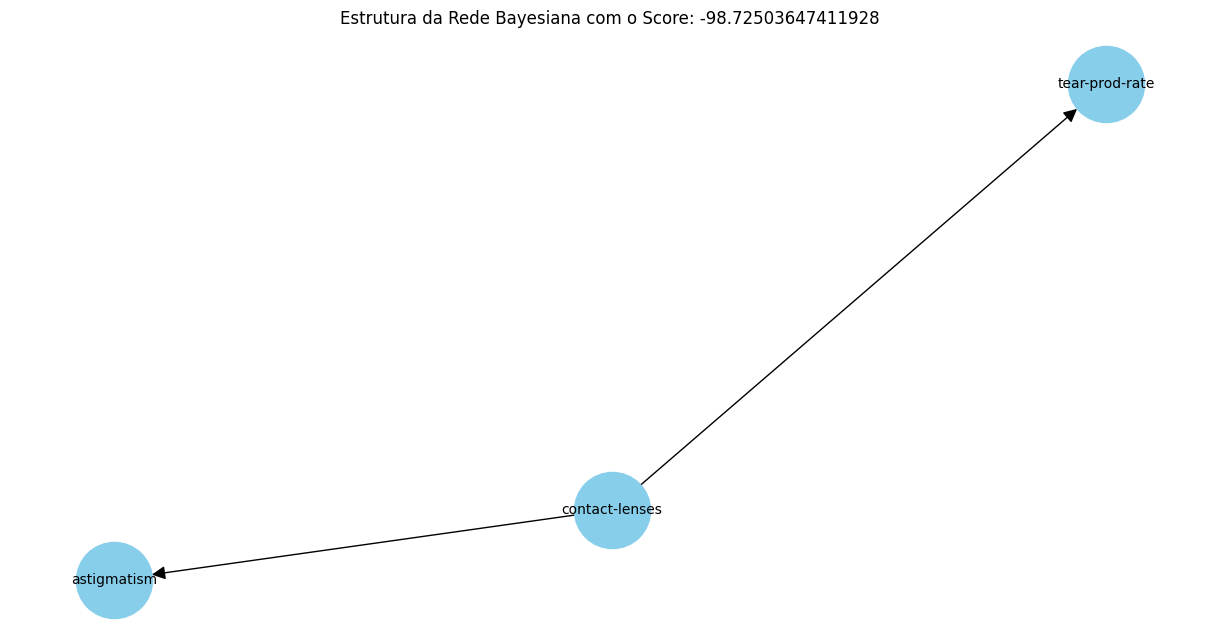

In [70]:
import matplotlib.pyplot as plt
import networkx as nx

# Criar um objeto de grafo direcionado
G = nx.DiGraph()

# Adicionar arestas ao grafo com base na estrutura do modelo
G.add_edges_from(estimated_model.edges())

# Plotar o grafo
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G)  # Define a posição dos nós
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, arrowsize=20)
plt.title(f"Estrutura da Rede Bayesiana com o Score: {k2_score}")
plt.show()